In [1]:
import Pkg
using Pkg; Pkg.activate()

  Activating project at `~/.julia/environments/v1.11`


In [1]:
using Pkg
Pkg.activate("/Users/melikeerbek/newtrinos")

  Activating project at `~/newtrinos`


In [2]:
Pkg.dev(Pkg.PackageSpec(path="/Users/melikeerbek/newtrinos/Newtrinos.jl"))

LoadError: UndefVarError: `dev` not defined in `Pkg`
Suggestion: check for spelling errors or missing imports.

In [2]:
using Revise

LoadError: ArgumentError: Package Revise not found in current path.
- Run `import Pkg; Pkg.add("Revise")` to install the Revise package.

In [3]:
using Distributions
using DataStructures
using DensityInterface
using Newtrinos

LoadError: ArgumentError: Package DataStructures not found in current path.
- Run `import Pkg; Pkg.add("DataStructures")` to install the DataStructures package.

In [7]:
import Pkg
Pkg.activate("/Users/melikeerbek/newtrinos")
Pkg.dev(Pkg.PackageSpec(path="/Users/melikeerbek/newtrinos/Newtrinos.jl"))


  Activating project at `~/newtrinos`


LoadError: UndefVarError: `dev` not defined in `Pkg`
Suggestion: check for spelling errors or missing imports.

In [4]:
using Newtrinos

LoadError: ArgumentError: Package Newtrinos not found in current path.
- Run `import Pkg; Pkg.add("Newtrinos")` to install the Newtrinos package.

In [4]:
Revise.revise(Newtrinos)

[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x3375af02e0ee1155, 0x8d38720ed4095fe7, 0x49cd728ca9053763, 0x3c4334514e181e3b, 0xa879cd1fcf43cf35, 0xd96113718e444cfe, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())
[ Info: (cuinit = HeterogeneousComputing.CPUnit(), precision = Float64, rng = Random123.Philox4x{UInt64, 10}(0x3375af02e0ee1155, 0x8d38720ed4095fe7, 0x49cd728ca9053763, 0x3c4334514e181e3b, 0xa879cd1fcf43cf35, 0xd96113718e444cfe, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), ad = ADTypes.AutoForwardDiff())
┌ Warning: Replacing docs for `Newtrinos.find_mle :: Tuple{Any, Any, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Newtrinos.profile :: NTuple{4, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Newtrinos.scan :: NTuple{4

true

In [5]:
osc = Newtrinos.osc.standard

Newtrinos.osc.standard

In [6]:
modules = [Newtrinos.dayabay]

1-element Vector{Module}:
 Newtrinos.dayabay

In [7]:
param_dict = merge(osc.params, [m.params for m in modules]...)
prior_dict = merge(osc.priors, [m.priors for m in modules]...)

OrderedDict{Any, Any} with 6 entries:
  :θ₁₂   => Uniform{Float64}(a=0.420534, b=0.785398)
  :θ₁₃   => Uniform{Float64}(a=0.1, b=0.2)
  :θ₂₃   => Uniform{Float64}(a=0.523599, b=1.0472)
  :δCP   => Uniform{Float64}(a=0.0, b=6.28319)
  :Δm²₂₁ => Uniform{Float64}(a=6.5e-5, b=9.0e-5)
  :Δm²₃₁ => Uniform{Float64}(a=0.002, b=0.003)

In [8]:
data = [m.observed for m in modules]

1-element Vector{Vector{Float64}}:
 [18388.160000000003, 24005.38, 33680.240000000005, 41465.35, 47637.770000000004, 52942.16, 54914.549999999996, 55474.310000000005, 54295.79, 51504.69  …  23443.870000000003, 18945.02, 15003.310000000001, 11523.35, 8862.91, 6213.89, 4414.6900000000005, 2892.5299999999997, 1834.24, 2128.56]

In [9]:
#data = [mean(m.forward_model(osc.osc_prob)(NamedTuple(param_dict))) for m in modules]

In [10]:
llh = Newtrinos.generate_likelihood(modules, osc, data)

LogFuncDensity(Newtrinos.var"#114#118"{Vector{Newtrinos.var"#113#117"{Int64, typeof(Newtrinos.osc.standard.osc_prob), Vector{Float64}, Vector{Module}}}}(Newtrinos.var"#113#117"{Int64, typeof(Newtrinos.osc.standard.osc_prob), Vector{Float64}, Vector{Module}}[Newtrinos.var"#113#117"{Int64, typeof(Newtrinos.osc.standard.osc_prob), Vector{Float64}, Vector{Module}}(1, Newtrinos.osc.standard.osc_prob, [18388.160000000003, 24005.38, 33680.240000000005, 41465.35, 47637.770000000004, 52942.16, 54914.549999999996, 55474.310000000005, 54295.79, 51504.69  …  23443.870000000003, 18945.02, 15003.310000000001, 11523.35, 8862.91, 6213.89, 4414.6900000000005, 2892.5299999999997, 1834.24, 2128.56], Module[Newtrinos.dayabay])]))

In [47]:
prior_dict[:θ₁₃] = Uniform(0.135, 0.16)
prior_dict[:Δm²₃₁] = Uniform(0.00225, 0.0028)
#prior_dict[:Δm²₃₁] = Uniform(-0.003, 0.003)

Uniform{Float64}(a=0.00225, b=0.0028)

In [48]:
for var in [:θ₁₂, :δCP, :Δm²₂₁, :θ₂₃]
    prior_dict[var] = param_dict[var]
end

In [49]:
prior_dict

OrderedDict{Any, Any} with 6 entries:
  :θ₁₂   => 0.587252
  :θ₁₃   => Uniform{Float64}(a=0.135, b=0.16)
  :θ₂₃   => 0.855629
  :δCP   => 1.0
  :Δm²₂₁ => 7.53e-5
  :Δm²₃₁ => Uniform{Float64}(a=0.00225, b=0.0028)

In [50]:
logdensityof(llh, NamedTuple(param_dict))

-168.90003273508339

In [51]:
using ForwardDiff

In [52]:
ForwardDiff.gradient(x -> logdensityof(llh, x), NamedTuple(param_dict))

(θ₁₂ = -0.8052505784083419, θ₁₃ = 447.230618721652, θ₂₃ = -0.0, δCP = -8.259697877652262e-17, Δm²₂₁ = 2652.398267153404, Δm²₃₁ = 19380.860903761673)

In [53]:
vars_to_scan = (θ₁₃ = 100, Δm²₃₁ = 100)

(θ₁₃ = 100, Δm²₃₁ = 100)

In [54]:
result = Newtrinos.scan(llh, prior_dict, vars_to_scan, param_dict, gradient_map=true);

In [20]:
using CairoMakie

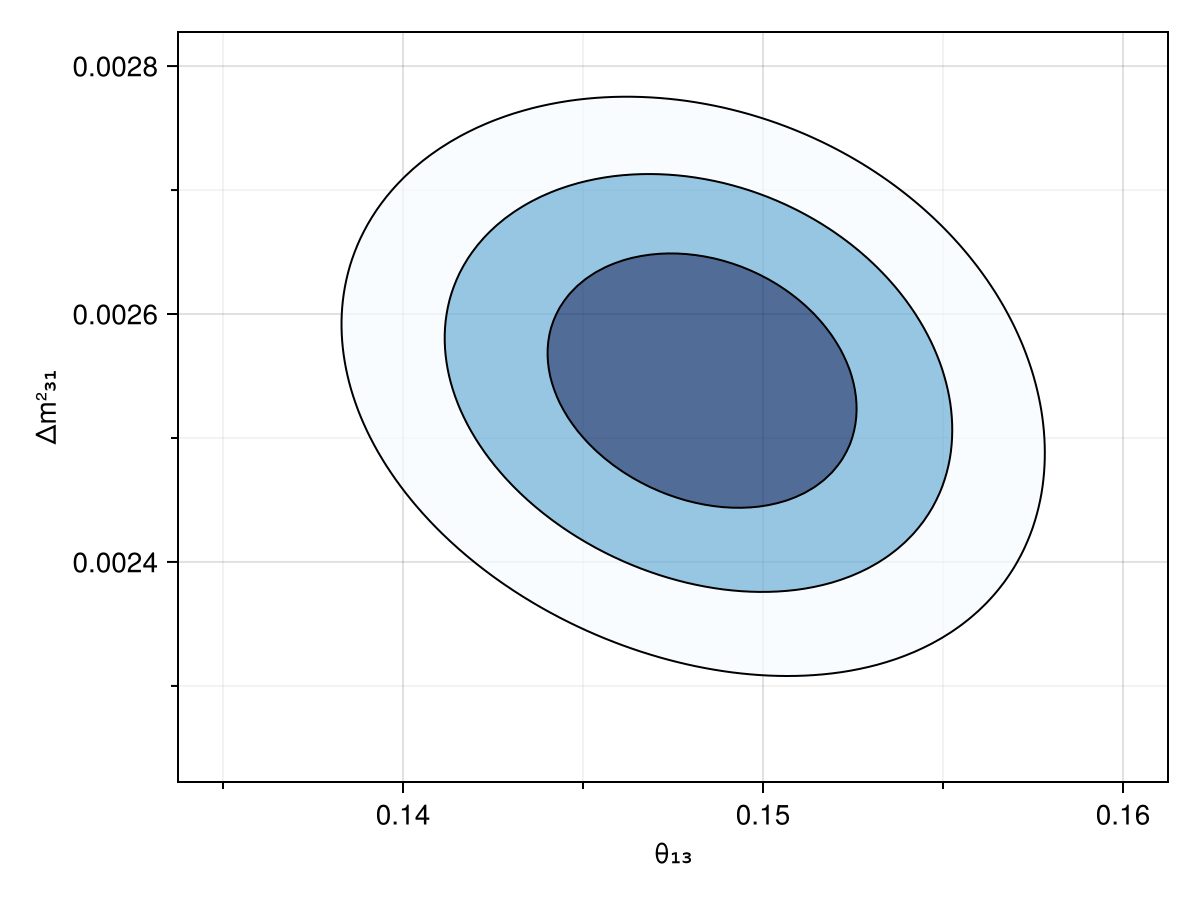

In [56]:
plot(result)

In [62]:
keys(result.values)

(:θ₁₂, :θ₂₃, :Δm²₂₁, :δCP, :δCP_grad, :Δm²₂₁_grad, :Δm²₃₁_grad, :θ₁₂_grad, :θ₁₃_grad, :θ₂₃_grad, :llh, :log_posterior)

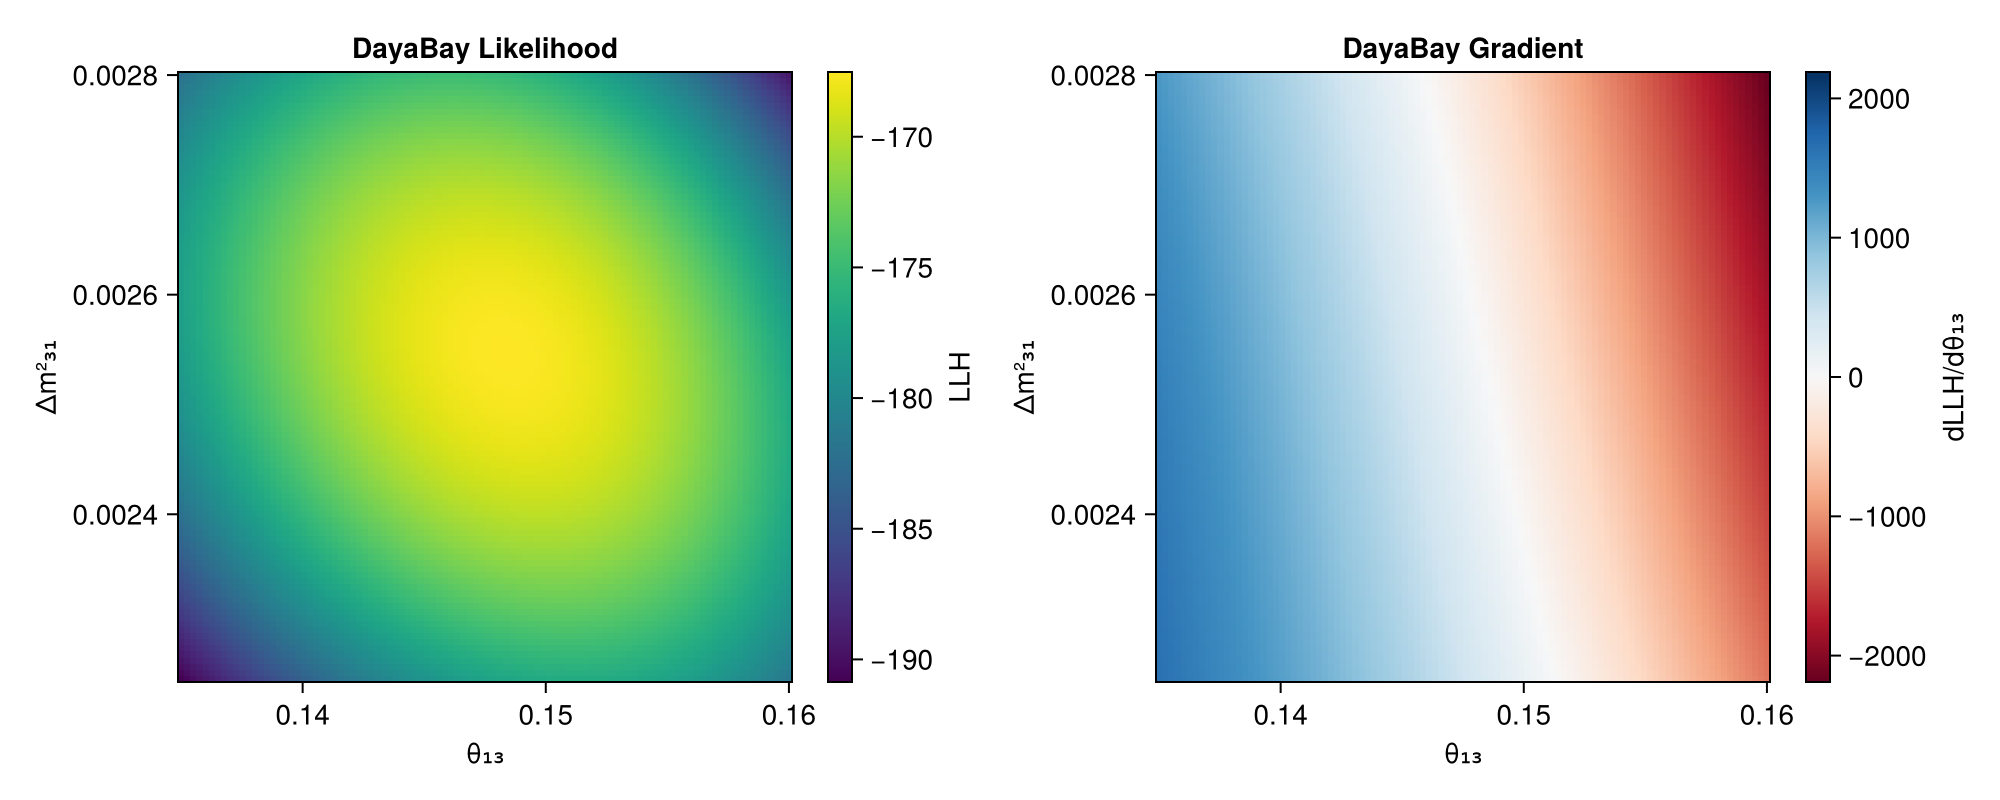

In [67]:
fig = Figure(size=(1000,400))
ax = Axis(fig[1,1], xlabel=String(keys(result.axes)[1]), ylabel=String(keys(result.axes)[2]), title="DayaBay Likelihood")
hm = heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)

Colorbar(fig[1,2], hm, label="LLH")
ax = Axis(fig[1,3], xlabel=String(keys(result.axes)[1]), ylabel=String(keys(result.axes)[2]), title="DayaBay Gradient")
key = :θ₁₃
h = result.values[Symbol(key, "_grad")]
colorrange = (-maximum(abs.(h)), maximum(abs.(h)))
hm = heatmap!(ax, result.axes[1], result.axes[2], h, colormap=:RdBu, colorrange=colorrange)
Colorbar(fig[1,4], hm, label="dLLH/d$(key)")
save("AD_test.png", fig)
fig

In [ ]:
Newtrinos.dayabay.plot(Newtrinos.bestfit(result), osc.osc_prob, data[1])

In [ ]:
using DataFrames
using DelimitedFiles

In [ ]:
df = DataFrame(readdlm("DayaBay_DeltaChiSq_NO_3158days.txt", skipstart=9,), :auto)
rename!(df, [:sin2theta13, :dm232, :deltachi2]);

In [ ]:
sh = (100, 100)

ax = (θ₁₃=0.5 .* asin.(sqrt.(reshape(df.sin2theta13, sh)[1,:])),
      Δm²₃₁=reshape(df.dm232, sh)[:,1] .+ 7.53e-5,)

chi2 = reshape(df.deltachi2, sh)';

In [ ]:
official = NewtrinosResult(axes=ax, values = (log_posterior =  -0.5 .*chi2,));

In [ ]:
f = plot(official)
ax = f.content[1]
xlims!(ax, 0.135, 0.16)
ylims!(ax, 2.3e-3, 2.8e-3)
f

In [ ]:
f = plot(result)
ax = f.content[1]
#xlims!(ax, 0.135, 0.16)
#ylims!(ax, 2.3e-3, 2.8e-3)
f